# Homework Assignment \#3

### Problem 5.

In [450]:
# source: https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

def kde1D(xx, bandwidth, kernel='tophat', bins=1000, color='darkorange', **kwargs):
    
    lw = 2 # line width
    
    xx = np.linspace(-5, 10, bins)[:, np.newaxis]
    true_dens = (0.3 * norm(0, 1).pdf(xx[:, 0]) + 0.7 * norm(5, 1).pdf(xx[:, 0]))
    # true_dens = np.linspace(-5, 10, 10)
    
    fig, ax = plt.subplots()
    ax.fill(xx[:, 0], true_dens, fc='black', alpha=0.2, label='input distribution')
    
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth)
    kde.fit(xx)
    
    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde.score_samples(xx))
    ax.plot(xx[:, 0], z, color=color, lw=lw, linestyle='-', label="kernel = '{0}'".format(kernel))
    
    ax.text(6.5, 0.3, "N={0} points".format(N))
    ax.legend(loc='upper left')

    plt.show()
    

# Plot a 1D density example
#N = 100
# np.random.seed(777)  # uncomment this if you want to fix the result
#X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
#                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

#kde1D(X, 0.5)


In [451]:
from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, kernel='tophat', xbins=100j, ybins=100j, cmap='RdPu', **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth, **kwargs)
    kde.fit(xy_train)
    
    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde.score_samples(xy_sample))
    zz = np.reshape(z, xx.shape)

    plt.pcolormesh(xx, yy, zz, cmap=cmap, shading='auto')
    plt.scatter(x, y, s=1, facecolor='blue')
    # cset = plt.contour(xx, yy, zz, colors='k', linewidths=0.5)
    # plt.clabel(cset, inline=1, fontsize=10)

    return xx, yy, zz


#np.random.seed(777)  # uncomment this if you want to fix the result
#m1 = np.random.normal(size=100)
#m2 = np.random.normal(scale=0.7, size=100)

#x, y = m1 + m2, m1 - m2;

#kde2D(x, y, 1);


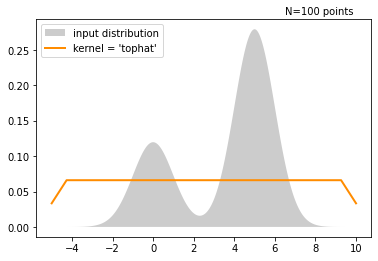

In [452]:
# (a)
import pandas as pd
x = pd.read_csv('hw3_data.csv')
N = 100
kde1D(x['amygdala'].to_numpy() , 0.75)

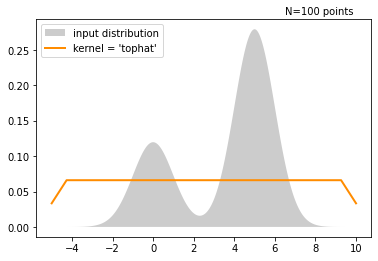

In [453]:
#(b)
kde1D(x['acc'].to_numpy() , 0.75)

(array([[-0.0756    , -0.0756    , -0.0756    , ..., -0.0756    ,
         -0.0756    , -0.0756    ],
        [-0.07395152, -0.07395152, -0.07395152, ..., -0.07395152,
         -0.07395152, -0.07395152],
        [-0.07230303, -0.07230303, -0.07230303, ..., -0.07230303,
         -0.07230303, -0.07230303],
        ...,
        [ 0.08430303,  0.08430303,  0.08430303, ...,  0.08430303,
          0.08430303,  0.08430303],
        [ 0.08595152,  0.08595152,  0.08595152, ...,  0.08595152,
          0.08595152,  0.08595152],
        [ 0.0876    ,  0.0876    ,  0.0876    , ...,  0.0876    ,
          0.0876    ,  0.0876    ]]),
 array([[-0.103    , -0.1009899, -0.0989798, ...,  0.0919798,  0.0939899,
          0.096    ],
        [-0.103    , -0.1009899, -0.0989798, ...,  0.0919798,  0.0939899,
          0.096    ],
        [-0.103    , -0.1009899, -0.0989798, ...,  0.0919798,  0.0939899,
          0.096    ],
        ...,
        [-0.103    , -0.1009899, -0.0989798, ...,  0.0919798,  0.0939899

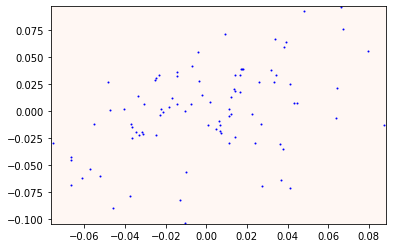

In [454]:
#(c)
kde2D(x['amygdala'] + x['acc'], x['amygdala'] - x['acc'], 0.75)

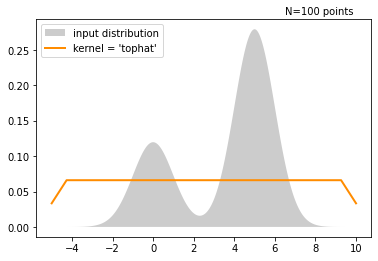

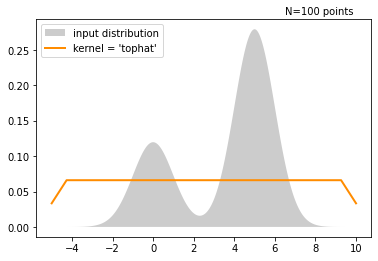

In [455]:
#(d)
kde1D(x[['amygdala','acc']], 0.75)
kde1D(x['amygdala']*x['acc'], 0.75)

In [456]:
#(e)
from queue import Empty

i=0.0000
while True:
    if not x[x.amygdala==0.035-i].empty:
        print(x[x.amygdala==0.035-i])
        break
    elif not x[x.amygdala==0.035+i].empty:
        print(x[x.amygdala==0.035+i])
        break
    i += 0.0001

    subject  amygdala     acc  orientation
79       80    0.0352 -0.0031            4


In [457]:
#(f)
i=0.0000
while True:
    if not x[x.acc==-0.02-i].empty:
        print(x[x.amygdala==-0.02-i])
        break
    elif not x[x.amygdala==-0.02+i].empty:
        print(x[x.amygdala==-0.02+i])
        break
    i += 0.0001

    subject  amygdala     acc  orientation
33       34   -0.0191 -0.0216            4


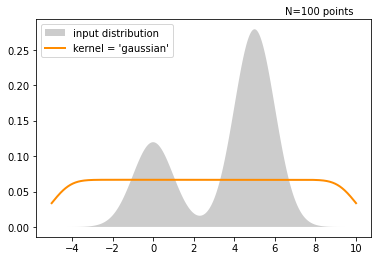

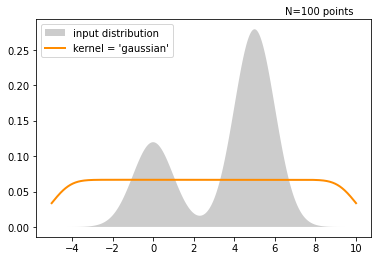

In [458]:
#(g)
#a
kde1D(x['amygdala'].to_numpy(), 0.75, kernel='gaussian')
#b
kde1D(x['acc'].to_numpy(), 0.75, kernel='gaussian')


(array([[-0.0756    , -0.0756    , -0.0756    , ..., -0.0756    ,
         -0.0756    , -0.0756    ],
        [-0.07395152, -0.07395152, -0.07395152, ..., -0.07395152,
         -0.07395152, -0.07395152],
        [-0.07230303, -0.07230303, -0.07230303, ..., -0.07230303,
         -0.07230303, -0.07230303],
        ...,
        [ 0.08430303,  0.08430303,  0.08430303, ...,  0.08430303,
          0.08430303,  0.08430303],
        [ 0.08595152,  0.08595152,  0.08595152, ...,  0.08595152,
          0.08595152,  0.08595152],
        [ 0.0876    ,  0.0876    ,  0.0876    , ...,  0.0876    ,
          0.0876    ,  0.0876    ]]),
 array([[-0.103    , -0.1009899, -0.0989798, ...,  0.0919798,  0.0939899,
          0.096    ],
        [-0.103    , -0.1009899, -0.0989798, ...,  0.0919798,  0.0939899,
          0.096    ],
        [-0.103    , -0.1009899, -0.0989798, ...,  0.0919798,  0.0939899,
          0.096    ],
        ...,
        [-0.103    , -0.1009899, -0.0989798, ...,  0.0919798,  0.0939899

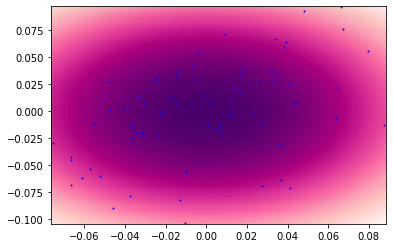

In [459]:
#(g)-c
kde2D(x['amygdala'] + x['acc'], x['amygdala'] - x['acc'], 0.75, kernel='gaussian')